In [1]:
from google.colab import drive    
 
drive.mount('/content/drive')
test_path='/content/drive/MyDrive/test_images'
train_path='/content/drive/MyDrive/train_images'
train_cpath='/content/drive/MyDrive/train.csv'
test_cpath='/content/drive/MyDrive/test.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
dataset = pd.read_csv(train_cpath)
dataset.values.tolist()
L=dataset['ClassName']
L1=dataset['ImageId']
l=np.unique(np.array(L))
l1=np.unique(np.array(L1))
img={}
cl={}
for i in range(len(l)):
  cl[i]=l[i]
cls_k=list(cl.keys())
cls_v=list(cl.values())
for i in range(len(dataset)):
  img[L1[i]]=cls_k[cls_v.index(L[i])]

In [3]:
X=[]
Y=[]
import cv2
import os
d=0
for a,b in img.items():
  path=os.path.join(train_path,a)
  image=cv2.imread(path,0)
  image=cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
  X.append(cv2.resize(image,(150,150)))
  Y.append(b)

input layer, dense layer,activation,embedding,masking,lambda are core layers
Convuluted layers- conv1d,2d,3d

A problem with the output feature maps is that they are sensitive to the location of the features in the input. One approach to address this sensitivity is to down sample the feature maps.Pooling layers provide an approach to down sampling feature maps by summarizing the presence of features in patches of the feature map. Two common pooling methods are average pooling and max pooling that summarize the average presence of a feature and the most activated presence of a feature respectively.

Maxpooling,Average pooling, globalmax pooling,global average pooling are examples.

we have sequential(list of layers)(add,pop methods), functional(industrial uses) and model subclassing(more out of the box cases) for models

activation functions include relu,selu,elu,sigmoid,tanh,softmax,softplus,softsign,exponential

available optimizers include SGD,RMSprop,Adam, Adadelta, Adagrad, Adamax,Nadam, Ftrl


In [ ]:
from sklearn.model_selection import train_test_split
X=X[0:5001]
Y=Y[0:5001]
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y)
X_train=np.asarray(X_train,float)/256
Y_train=np.asarray(Y_train)
X_valid=np.asarray(X_valid,float)/256
Y_valid=np.asarray(Y_valid)
from keras.utils import to_categorical
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from tensorflow.keras import activations
from tensorflow.keras import regularizers
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(150,150,3),activity_regularizer=regularizers.L2(0.01)))
model.add(Dense(20,activation='relu'))
model.add(layers.Activation(activations.relu))
model.add(Conv2D(kernel_size = (3,3),filters=64,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dense(61,activation = 'softmax'))
    
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='SGD')
m = model.fit(X_train,Y_train,epochs=50,batch_size=8,validation_data=(X_valid,Y_valid))

Epoch 1/50
469/469 [==============================] - 72s 142ms/step - loss: 8.6706 - acc: 0.0805 - val_loss: 4.0491 - val_acc: 0.0847
Epoch 2/50
469/469 [==============================] - 65s 138ms/step - loss: 4.0367 - acc: 0.0889 - val_loss: 3.9973 - val_acc: 0.0847
Epoch 3/50
469/469 [==============================] - 65s 139ms/step - loss: 3.9853 - acc: 0.0838 - val_loss: 3.9555 - val_acc: 0.0847
Epoch 4/50
469/469 [==============================] - 65s 139ms/step - loss: 3.9504 - acc: 0.0833 - val_loss: 3.9227 - val_acc: 0.0847
Epoch 5/50
469/469 [==============================] - 65s 139ms/step - loss: 3.9079 - acc: 0.0991 - val_loss: 3.8974 - val_acc: 0.0847
Epoch 6/50
469/469 [==============================] - 65s 139ms/step - loss: 3.9001 - acc: 0.0841 - val_loss: 3.8780 - val_acc: 0.0847
Epoch 7/50
469/469 [==============================] - 65s 139ms/step - loss: 3.8795 - acc: 0.0924 - val_loss: 3.8630 - val_acc: 0.0847
Epoch 8/50
469/469 [==============================] - 6

The number of examples from the training dataset used in the estimate of the error gradient is called the batch size and is an important hyperparameter that influences the dynamics of the learning algorithm.Batch size controls the accuracy of the estimate of the error gradient when training neural networks.

Stochastic gradient descent:-
batch size =1
Batch gradient descent:-
batch size=len(X_train)
Mini batch gradient descent:-
len(X_train)>batch size>1 

An epoch is one learning cycle where the learner sees the whole training data set. If you have two batches, the learner needs to go through two iterations for one epoch

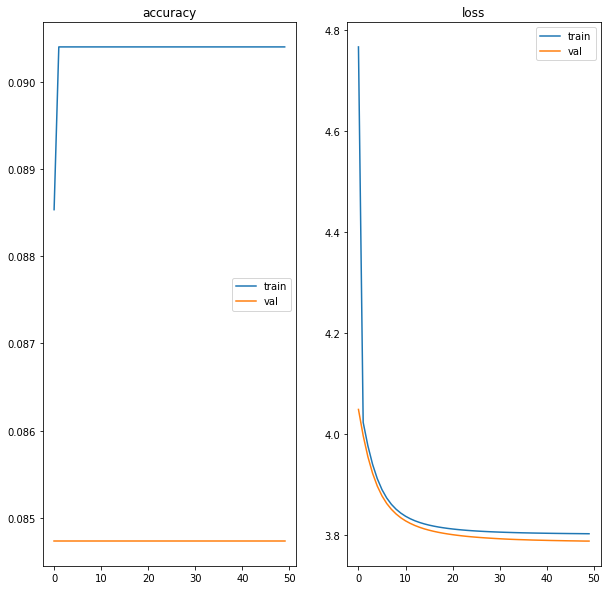

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])

experimenting with activation functions

sigmoid , tanh, exponential activation functions

In [ ]:
from sklearn.model_selection import train_test_split
X=X[0:5001]
Y=Y[0:5001]
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y)
X_train=np.asarray(X_train,float)/256
Y_train=np.asarray(Y_train)
X_valid=np.asarray(X_valid,float)/256
Y_valid=np.asarray(Y_valid)
from keras.utils import to_categorical
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from tensorflow.keras import activations
from tensorflow.keras import regularizers
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(150,150,3)))
model.add(Dense(20,activation='relu'))
model.add(layers.Activation(activations.sigmoid))
model.add(Conv2D(kernel_size = (3,3),filters=64,activation='sigmoid'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='sigmoid'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='sigmoid'))
model.add(Flatten())
model.add(Dense(61,activation = 'sigmoid'))
    
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='SGD')
m = model.fit(X_train,Y_train,epochs=50,batch_size=8,validation_data=(X_valid,Y_valid))

Epoch 1/50
469/469 [==============================] - 102s 147ms/step - loss: 26.1445 - acc: 0.0832 - val_loss: 3.8693 - val_acc: 0.0927
Epoch 2/50
469/469 [==============================] - 71s 150ms/step - loss: 3.9781 - acc: 0.0838 - val_loss: 3.9599 - val_acc: 0.0927
Epoch 3/50
469/469 [==============================] - 70s 150ms/step - loss: 3.9393 - acc: 0.0783 - val_loss: 3.8678 - val_acc: 0.0927
Epoch 4/50
469/469 [==============================] - 70s 149ms/step - loss: 3.8769 - acc: 0.0840 - val_loss: 4.6685 - val_acc: 0.0472
Epoch 5/50
469/469 [==============================] - 70s 149ms/step - loss: 3.9098 - acc: 0.0910 - val_loss: 3.8125 - val_acc: 0.0927
Epoch 6/50
469/469 [==============================] - 70s 150ms/step - loss: 3.8377 - acc: 0.0893 - val_loss: 3.8066 - val_acc: 0.0927
Epoch 7/50
469/469 [==============================] - 70s 150ms/step - loss: 3.8033 - acc: 0.0918 - val_loss: 3.8080 - val_acc: 0.0927
Epoch 8/50
469/469 [==============================] -

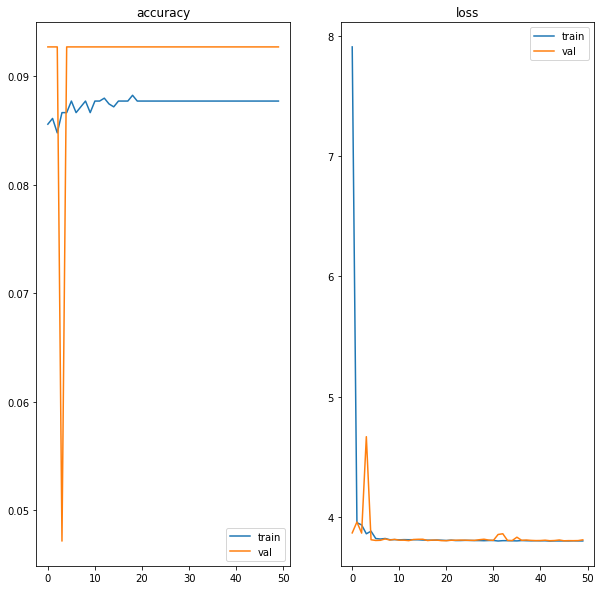

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])

In [4]:
from sklearn.model_selection import train_test_split
X=X[0:5001]
Y=Y[0:5001]
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y)
X_train=np.asarray(X_train,float)/256
Y_train=np.asarray(Y_train)
X_valid=np.asarray(X_valid,float)/256
Y_valid=np.asarray(Y_valid)
from keras.utils import to_categorical
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from tensorflow.keras import activations
from tensorflow.keras import regularizers
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(150,150,3),activity_regularizer=regularizers.L2(0.01)))
model.add(Dense(20,activation='relu'))
model.add(layers.Activation(activations.sigmoid))
model.add(Conv2D(kernel_size = (3,3),filters=64,activation='tanh',activity_regularizer=regularizers.L2(0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='tanh',activity_regularizer=regularizers.L2(0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='tanh',activity_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dense(61,activation = 'tanh'))
    
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='SGD')
m = model.fit(X_train,Y_train,epochs=50,batch_size=8,validation_data=(X_valid,Y_valid))

Epoch 1/50
469/469 [==============================] - 77s 156ms/step - loss: 88816.8866 - acc: 0.0098 - val_loss: 90005.5469 - val_acc: 0.0080
Epoch 2/50
469/469 [==============================] - 71s 151ms/step - loss: 90004.7360 - acc: 0.0106 - val_loss: 90005.5469 - val_acc: 0.0080
Epoch 3/50
469/469 [==============================] - 71s 152ms/step - loss: 90004.6625 - acc: 0.0094 - val_loss: 90005.5469 - val_acc: 0.0080
Epoch 4/50
469/469 [==============================] - 71s 152ms/step - loss: 90004.6432 - acc: 0.0090 - val_loss: 90005.5469 - val_acc: 0.0080
Epoch 5/50
469/469 [==============================] - 71s 152ms/step - loss: 90004.1327 - acc: 0.0104 - val_loss: 90005.5469 - val_acc: 0.0080
Epoch 6/50
469/469 [==============================] - 72s 153ms/step - loss: 90004.3174 - acc: 0.0104 - val_loss: 90005.5469 - val_acc: 0.0080
Epoch 7/50
469/469 [==============================] - 71s 152ms/step - loss: 90004.5875 - acc: 0.0108 - val_loss: 90005.5469 - val_acc: 0.0080

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])

In [4]:
from sklearn.model_selection import train_test_split
X=X[0:5001]
Y=Y[0:5001]
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y)
X_train=np.asarray(X_train,float)/256
Y_train=np.asarray(Y_train)
X_valid=np.asarray(X_valid,float)/256
Y_valid=np.asarray(Y_valid)
from keras.utils import to_categorical
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from tensorflow.keras import activations
from tensorflow.keras import regularizers
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(150,150,3),activity_regularizer=regularizers.L2(0.01)))
model.add(Dense(20,activation='relu'))
model.add(layers.Activation(activations.exponential))
model.add(Conv2D(kernel_size = (3,3),filters=64,activation='exponential',activity_regularizer=regularizers.L2(0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='exponential',activity_regularizer=regularizers.L2(0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='exponential',activity_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dense(61,activation = 'exponential'))
    
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='SGD')
m = model.fit(X_train,Y_train,epochs=50,batch_size=8,validation_data=(X_valid,Y_valid))

Epoch 1/50
469/469 [==============================] - 77s 146ms/step - loss: nan - acc: 0.0063 - val_loss: nan - val_acc: 0.0032
Epoch 2/50
469/469 [==============================] - 67s 144ms/step - loss: nan - acc: 0.0050 - val_loss: nan - val_acc: 0.0032
Epoch 3/50
469/469 [==============================] - 68s 145ms/step - loss: nan - acc: 0.0048 - val_loss: nan - val_acc: 0.0032
Epoch 4/50
469/469 [==============================] - 69s 146ms/step - loss: nan - acc: 0.0037 - val_loss: nan - val_acc: 0.0032
Epoch 5/50
469/469 [==============================] - 69s 146ms/step - loss: nan - acc: 0.0067 - val_loss: nan - val_acc: 0.0032
Epoch 6/50
469/469 [==============================] - 69s 146ms/step - loss: nan - acc: 0.0071 - val_loss: nan - val_acc: 0.0032
Epoch 7/50
469/469 [==============================] - 69s 147ms/step - loss: nan - acc: 0.0053 - val_loss: nan - val_acc: 0.0032
Epoch 8/50
469/469 [==============================] - 69s 147ms/step - loss: nan - acc: 0.0080 - 

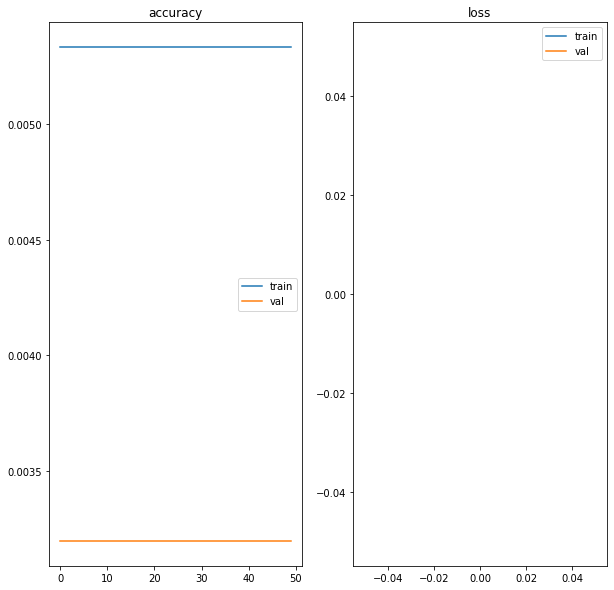

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])

experimenting with types of optimizations
adam,sgd,nadam

In [ ]:
from sklearn.model_selection import train_test_split
X=X[0:5001]
Y=Y[0:5001]
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y)
X_train=np.asarray(X_train,float)/256
Y_train=np.asarray(Y_train)
X_valid=np.asarray(X_valid,float)/256
Y_valid=np.asarray(Y_valid)
from keras.utils import to_categorical
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from tensorflow.keras import activations
from tensorflow.keras import regularizers
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(150,150,3),activity_regularizer=regularizers.L2(0.01)))
model.add(Dense(20,activation='relu'))
model.add(layers.Activation(activations.sigmoid))
model.add(Conv2D(kernel_size = (3,3),filters=64,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dense(61,activation = 'softmax'))
    
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')
m = model.fit(X_train,Y_train,epochs=50,batch_size=8,validation_data=(X_valid,Y_valid))

Epoch 1/50
469/469 [==============================] - 119s 182ms/step - loss: 55.0189 - acc: 0.0870 - val_loss: 3.8593 - val_acc: 0.0775
Epoch 2/50
469/469 [==============================] - 85s 181ms/step - loss: 3.8698 - acc: 0.0802 - val_loss: 3.8410 - val_acc: 0.0775
Epoch 3/50
469/469 [==============================] - 85s 180ms/step - loss: 3.8493 - acc: 0.0955 - val_loss: 3.8535 - val_acc: 0.0775
Epoch 4/50
469/469 [==============================] - 84s 180ms/step - loss: 3.8517 - acc: 0.0974 - val_loss: 3.8489 - val_acc: 0.0775
Epoch 5/50
469/469 [==============================] - 84s 180ms/step - loss: 3.8749 - acc: 0.0900 - val_loss: 3.8813 - val_acc: 0.0775
Epoch 6/50
469/469 [==============================] - 84s 180ms/step - loss: 3.8662 - acc: 0.0956 - val_loss: 4.0082 - val_acc: 0.0775
Epoch 7/50
469/469 [==============================] - 84s 179ms/step - loss: 3.9859 - acc: 0.0873 - val_loss: 3.9467 - val_acc: 0.0775
Epoch 8/50
469/469 [==============================] -

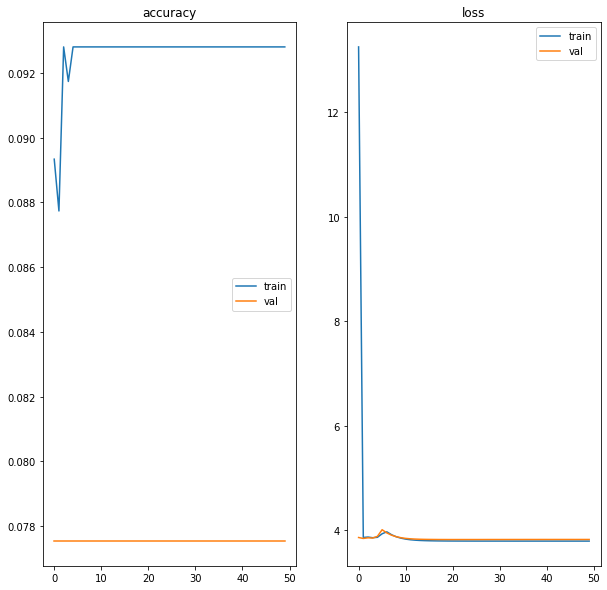

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])

In [ ]:
from sklearn.model_selection import train_test_split
X=X[0:5001]
Y=Y[0:5001]
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y)
X_train=np.asarray(X_train,float)/256
Y_train=np.asarray(Y_train)
X_valid=np.asarray(X_valid,float)/256
Y_valid=np.asarray(Y_valid)
from keras.utils import to_categorical
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from tensorflow.keras import activations
from tensorflow.keras import regularizers
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(150,150,3),activity_regularizer=regularizers.L2(0.01)))
model.add(Dense(20,activation='relu'))
model.add(layers.Activation(activations.sigmoid))
model.add(Conv2D(kernel_size = (3,3),filters=64,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dense(61,activation = 'softmax'))
    
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='nadam')
m = model.fit(X_train,Y_train,epochs=50,batch_size=8,validation_data=(X_valid,Y_valid))

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])

Different pooling strategies- Max pooling and average pooling

In [5]:
from sklearn.model_selection import train_test_split
X=X[0:5001]
Y=Y[0:5001]
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y)
X_train=np.asarray(X_train,float)/256
Y_train=np.asarray(Y_train)
X_valid=np.asarray(X_valid,float)/256
Y_valid=np.asarray(Y_valid)
from keras.utils import to_categorical
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,AvgPool2D
from keras.models import Sequential
from tensorflow.keras import activations
from tensorflow.keras import regularizers
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(150,150,3),activity_regularizer=regularizers.L2(0.01)))
model.add(Dense(20,activation='relu'))
model.add(layers.Activation(activations.relu))
model.add(Conv2D(kernel_size = (3,3),filters=64,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(AvgPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(AvgPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dense(61,activation = 'softmax'))
    
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='SGD')
m = model.fit(X_train,Y_train,epochs=50,batch_size=8,validation_data=(X_valid,Y_valid))

Epoch 1/50
469/469 [==============================] - 101s 150ms/step - loss: nan - acc: 0.0072 - val_loss: nan - val_acc: 0.0016
Epoch 2/50
469/469 [==============================] - 67s 144ms/step - loss: nan - acc: 0.0056 - val_loss: nan - val_acc: 0.0016
Epoch 3/50
469/469 [==============================] - 68s 144ms/step - loss: nan - acc: 0.0043 - val_loss: nan - val_acc: 0.0016
Epoch 4/50
469/469 [==============================] - 68s 144ms/step - loss: nan - acc: 0.0052 - val_loss: nan - val_acc: 0.0016
Epoch 5/50
469/469 [==============================] - 68s 144ms/step - loss: nan - acc: 0.0050 - val_loss: nan - val_acc: 0.0016
Epoch 6/50
469/469 [==============================] - 68s 144ms/step - loss: nan - acc: 0.0042 - val_loss: nan - val_acc: 0.0016
Epoch 7/50
469/469 [==============================] - 68s 144ms/step - loss: nan - acc: 0.0062 - val_loss: nan - val_acc: 0.0016
Epoch 8/50
469/469 [==============================] - 68s 144ms/step - loss: nan - acc: 0.0069 -

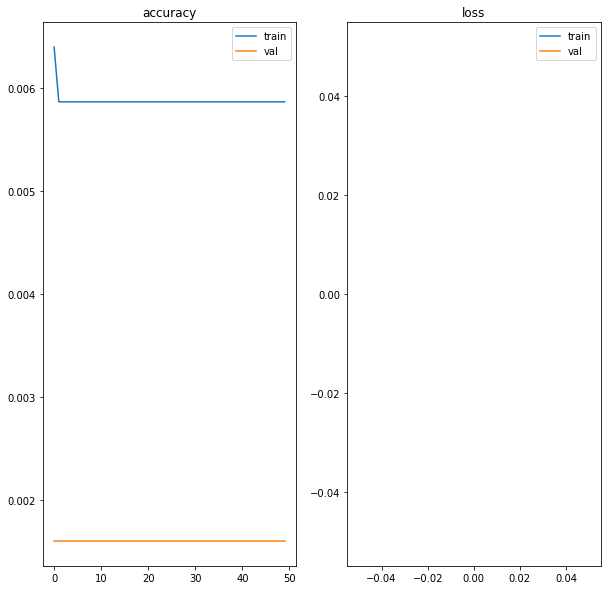

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])

Batch Normalization

In [ ]:
from sklearn.model_selection import train_test_split
X=X[0:5001]
Y=Y[0:5001]
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y)
X_train=np.asarray(X_train,float)/256
Y_train=np.asarray(Y_train)
X_valid=np.asarray(X_valid,float)/256
Y_valid=np.asarray(Y_valid)
from keras.utils import to_categorical
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.models import Sequential
from tensorflow.keras import activations
from tensorflow.keras import regularizers
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(150,150,3),activity_regularizer=regularizers.L2(0.01)))
model.add(BatchNormalization())
model.add(Dense(20,activation='relu'))
model.add(layers.Activation(activations.relu))
model.add(Conv2D(kernel_size = (3,3),filters=64,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(layers.Activation(activations.relu))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(61,activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='SGD')
m = model.fit(X_train,Y_train,epochs=50,batch_size=8,validation_data=(X_valid,Y_valid))

Epoch 1/50
469/469 [==============================] - 108s 157ms/step - loss: nan - acc: 0.0338 - val_loss: nan - val_acc: 0.0264
Epoch 2/50
469/469 [==============================] - 72s 154ms/step - loss: nan - acc: 0.0325 - val_loss: nan - val_acc: 0.0408
Epoch 3/50
469/469 [==============================] - 72s 154ms/step - loss: nan - acc: 0.0275 - val_loss: nan - val_acc: 0.0280
Epoch 4/50
469/469 [==============================] - 72s 153ms/step - loss: nan - acc: 0.0272 - val_loss: nan - val_acc: 0.0072
Epoch 5/50
469/469 [==============================] - 71s 152ms/step - loss: nan - acc: 0.0048 - val_loss: nan - val_acc: 0.0072
Epoch 6/50
469/469 [==============================] - 71s 152ms/step - loss: nan - acc: 0.0042 - val_loss: nan - val_acc: 0.0072
Epoch 7/50
469/469 [==============================] - 71s 152ms/step - loss: nan - acc: 0.0030 - val_loss: nan - val_acc: 0.0072
Epoch 8/50
469/469 [==============================] - 71s 152ms/step - loss: nan - acc: 0.0047 -

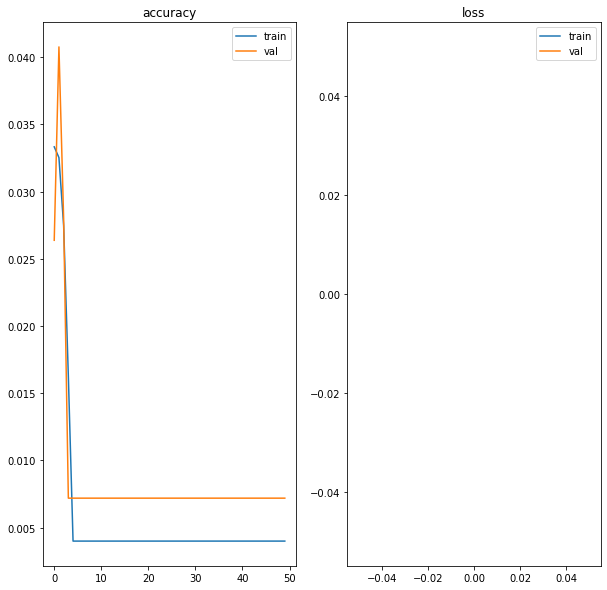

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])

Dropout layer

In [ ]:
from sklearn.model_selection import train_test_split
X=X[0:5001]
Y=Y[0:5001]
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y)
X_train=np.asarray(X_train,float)/256
Y_train=np.asarray(Y_train)
X_valid=np.asarray(X_valid,float)/256
Y_valid=np.asarray(Y_valid)
from keras.utils import to_categorical
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from tensorflow.keras import activations
from tensorflow.keras import regularizers
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(150,150,3),activity_regularizer=regularizers.L2(0.01)))
model.add(Dense(20,activation='relu'))
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.6))
model.add(Conv2D(kernel_size = (3,3),filters=64,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Dropout(0.5))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='SGD')
m = model.fit(X_train,Y_train,epochs=50,batch_size=8,validation_data=(X_valid,Y_valid))

Epoch 1/50
469/469 [==============================] - 86s 162ms/step - loss: nan - acc: 0.0083 - val_loss: nan - val_acc: 0.0056
Epoch 2/50
469/469 [==============================] - 73s 156ms/step - loss: nan - acc: 0.0053 - val_loss: nan - val_acc: 0.0056
Epoch 3/50
469/469 [==============================] - 73s 156ms/step - loss: nan - acc: 0.0045 - val_loss: nan - val_acc: 0.0056
Epoch 4/50
469/469 [==============================] - 73s 156ms/step - loss: nan - acc: 0.0056 - val_loss: nan - val_acc: 0.0056
Epoch 5/50
469/469 [==============================] - 73s 156ms/step - loss: nan - acc: 0.0037 - val_loss: nan - val_acc: 0.0056
Epoch 6/50
469/469 [==============================] - 73s 156ms/step - loss: nan - acc: 0.0028 - val_loss: nan - val_acc: 0.0056
Epoch 7/50
469/469 [==============================] - 73s 156ms/step - loss: nan - acc: 0.0059 - val_loss: nan - val_acc: 0.0056
Epoch 8/50
469/469 [==============================] - 73s 156ms/step - loss: nan - acc: 0.0044 - 

NameError: ignored

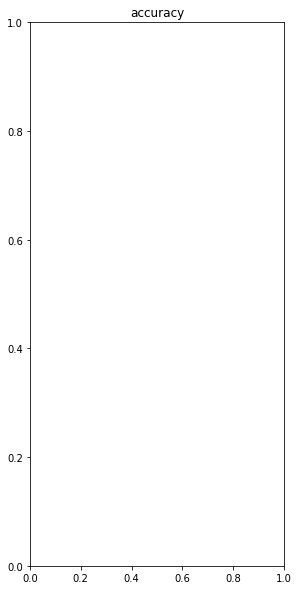

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])

Extra layer addition

In [ ]:
from sklearn.model_selection import train_test_split
X=X[0:5001]
Y=Y[0:5001]
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y)
X_train=np.asarray(X_train,float)/256
Y_train=np.asarray(Y_train)
X_valid=np.asarray(X_valid,float)/256
Y_valid=np.asarray(Y_valid)
from keras.utils import to_categorical
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from tensorflow.keras import activations
from tensorflow.keras import regularizers
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(150,150,3),activity_regularizer=regularizers.L2(0.01)))
model.add(Dense(20,activation='relu'))
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.6))
model.add(Conv2D(kernel_size = (3,3),filters=64,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(layers.Activation(activations.sigmoid))
model.add(Conv2D(kernel_size=(3,3),filters=128,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(MaxPool2D(pool_size=(2,2),strides=(1, 1), padding='valid'))
model.add(Dropout(0.5))
model.add(Dense(25,activation='relu'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu',activity_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(61,activation = 'softmax'))
    
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='SGD')
m = model.fit(X_train,Y_train,epochs=50,batch_size=8,validation_data=(X_valid,Y_valid))

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('accuracy')
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.legend(['train','val'])

plt.subplot(122)
plt.title('loss')
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.legend(['train','val'])

Augumentation ??